In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.shape

(180, 9)

There are no null values in any of the 180 rows and 9 columns. Hence there are no missing entries that could potentially bias the analysis.

# Detection of Outliners

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


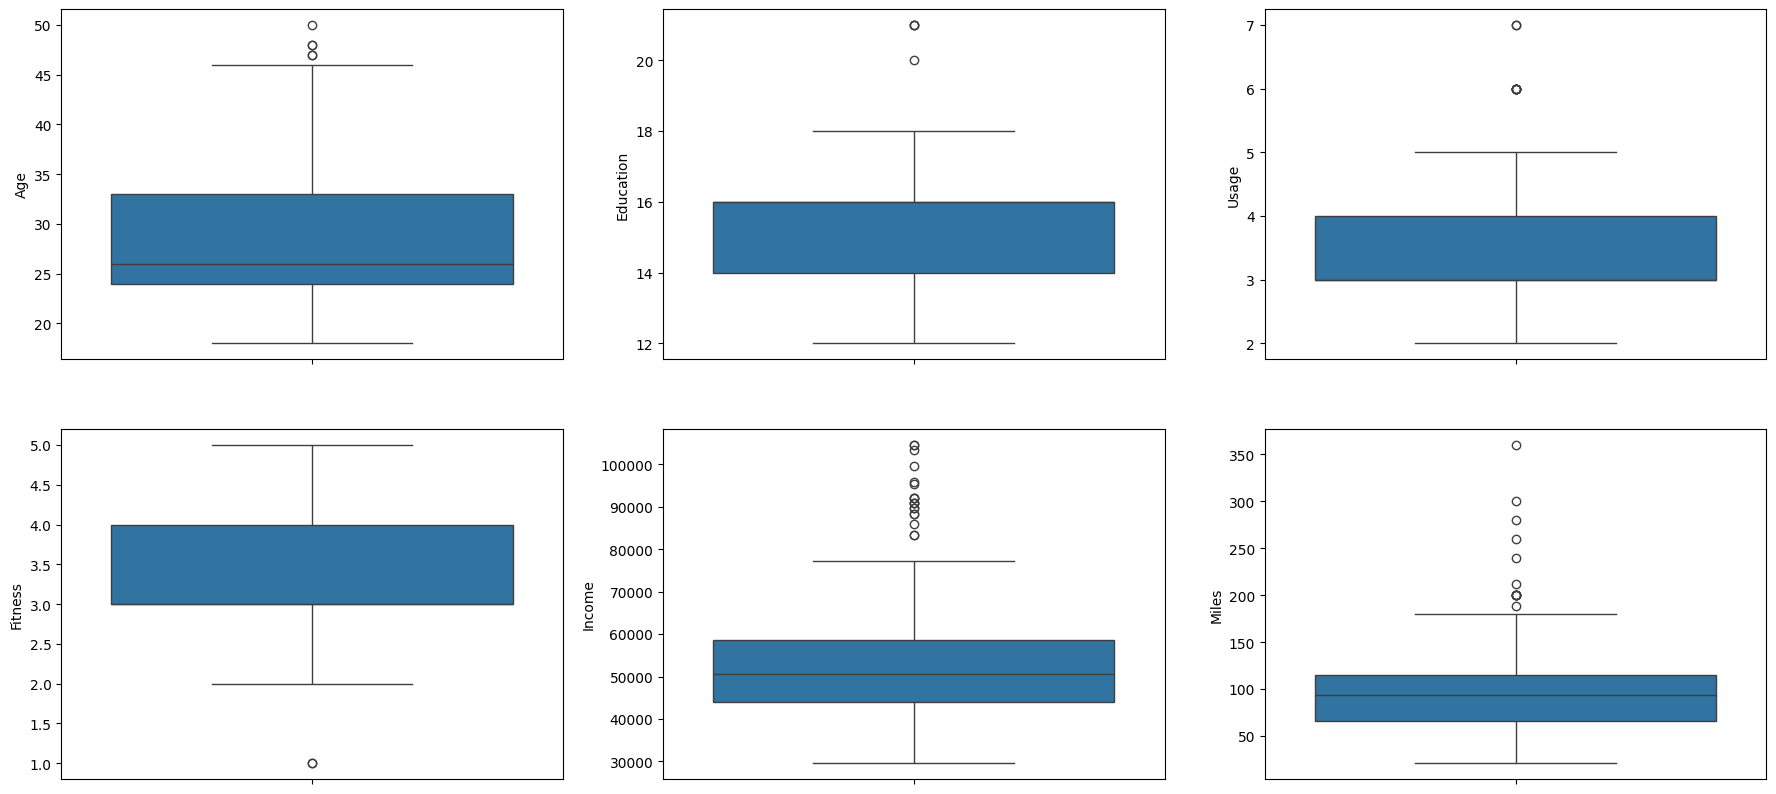

In [6]:
plt.figure(figsize=(22, 10))
plt.subplot(2,3,1)
sns.boxplot(data=df, y='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df, y='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df, y='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df, y='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df, y='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df, y='Miles')
plt.show()

We observe variances between the mean and median (50th percentile) across all the columns above which can be shown in the table as well as the graph. <br>
Positive skewness is evident in Age (in years), Usage (on a weekly basis), Fitness (self-rated fitness on a 1-to-5 scale), Income, and Miles (distance covered by walking/running), while negative skewness is apparent in Education (total number of years).
 - Age: A younger population demographic is more inclined to purchase most of the products, with some exceptions.
 - Usage: The majority of users exhibit low to moderate engagement in a week, with a few highly engaged outliers.
 - Income: There is a larger segment with lower income, potentially suggesting affordability as a key factor in purchasing decisions with multiple outliers above 80000.
 - Miles: Most users walk/run shorter distances, although there are a few outliers covering significantly longer distances.<br><br>
Understanding these trends could inform targeted marketing strategies or product development tailored to different age groups or income brackets.<br>
Negative skewness is observed in Education, signifying a concentration of individuals with fewer years of schooling and a smaller proportion with higher educational attainment. This suggests a potential focus on individuals with lower educational backgrounds when targeting the audience. But when checked for each product in a box plot then we do not see any ouliner

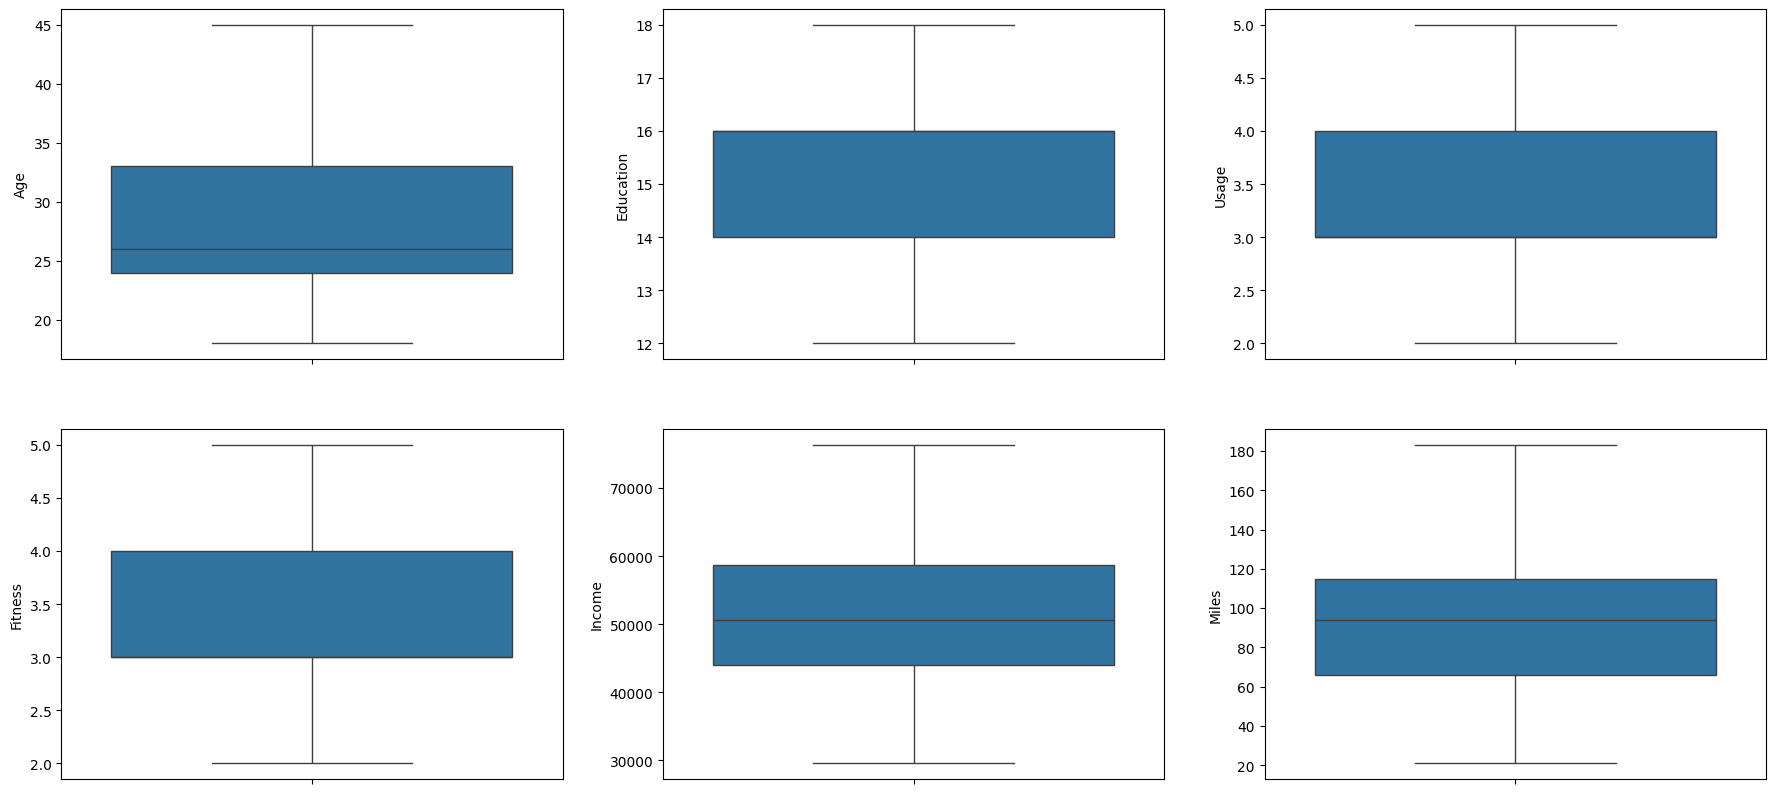

In [7]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
low, high=df.Age.quantile([0, 0.97]).astype(int)
df_age=df.Age.clip(low, high)
sns.boxplot(data=df_age)
plt.subplot(2,3,2)
low, high=df.Education.quantile([0, 0.98]).astype(int)
df_Education=df.Education.clip(low, high)
sns.boxplot(data=df_Education)
plt.subplot(2,3,3)
low, high=df.Usage.quantile([0, 0.94]).astype(int)
df_Usage=df.Usage.clip(low, high)
sns.boxplot(data=df_Usage)
plt.subplot(2,3,4)
low, high=df.Fitness.quantile([0.02, 1]).astype(int)
df_Fitness=df.Fitness.clip(low, high)
sns.boxplot(data=df_Fitness)
plt.subplot(2,3,5)
low, high=df.Income.quantile([0, 0.89]).astype(int)
df_Income=df.Income.clip(low, high)
sns.boxplot(data=df_Income)
plt.subplot(2,3,6)
low, high=df.Miles.quantile([0, 0.93]).astype(int)
df_Miles=df.Miles.clip(low, high)
sns.boxplot(data=df_Miles)

plt.show()

Manually adjusting the Percentile range based on outliners of each column to get a least biased data frame as much as possible by using Clipping/clip() <br>
 - Defination: Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

In [8]:
df1=df
low, high=df1.Age.quantile([0, 0.97]).astype(int)
df1.Age=df1.Age.clip(low, high)
low, high=df1.Education.quantile([0, 0.98]).astype(int)
df1.Education=df1.Education.clip(low, high)
low, high=df1.Usage.quantile([0, 0.94]).astype(int)
df1.Usage=df1.Usage.clip(low, high)
low, high=df1.Fitness.quantile([0.02, 1]).astype(int)
df1.Fitness=df1.Fitness.clip(low, high)
low, high=df1.Income.quantile([0, 0.89]).astype(int)
df1.Income=df1.Income.clip(low, high)
low, high=df1.Miles.quantile([0, 0.93]).astype(int)
df1.Miles=df1.Miles.clip(low, high)
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.70000,15.511111,3.394444,3.322222,51986.761111,99.522222
std,6.70937,1.462717,0.948372,0.937461,12571.018690,41.436828
min,18.00000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.00000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.00000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.00000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,45.00000,18.000000,5.000000,5.000000,76331.000000,183.000000


## Business Insights: <br>
 - The average age of customers is approximately 28 years old, with the majority having an education level of around 15 years. This suggests that the target audience might be young adults who have completed some form of higher education. The youngest customer is 18, and the oldest is approximately 45.63 years old. Understanding this age distribution can help businesses target specific age groups for marketing campaigns or product development.<br>
 - The education level of customers varies, with a minimum of 12 years and a maximum of 18.84 years. This suggests a diverse customer base with varying preferences and needs. Businesses can conduct further market research to understand how education level correlates with product preferences and tailor their offerings accordingly.<br>
 - The average product usage is around 3.4 days per week, and customers have an average fitness level of 3.32. This indicates that customers are moderately engaged with the product and are moderately fit. These insights underscore the importance of promoting features that encourage consistent product usage while aligning with the fitness goals and preferences of the customer base.<br>
 - The average income is approximately 51,987 dollars with a standard deviation of 12,571 dollars. This indicates that the target market has a moderate to moderate-high income level. Businesses can use this information to price their products accordingly and offer appropriate discounts or financing options.<br>
 - On average, customers cover around 99.58 miles. This information is valuable, as it allows us to understand the average distance customers travel by walking/running and tailor our services or products to accommodate this.

In [9]:
df1[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.303753,0.016067,0.058088,0.555540,0.025002
Education,0.303753,1.000000,0.389479,0.437379,0.645252,0.358822
Usage,0.016067,0.389479,1.000000,0.660556,0.447165,0.779033
Fitness,0.058088,0.437379,0.660556,1.000000,0.506231,0.833085
Income,0.555540,0.645252,0.447165,0.506231,1.000000,0.489584
Miles,0.025002,0.358822,0.779033,0.833085,0.489584,1.000000


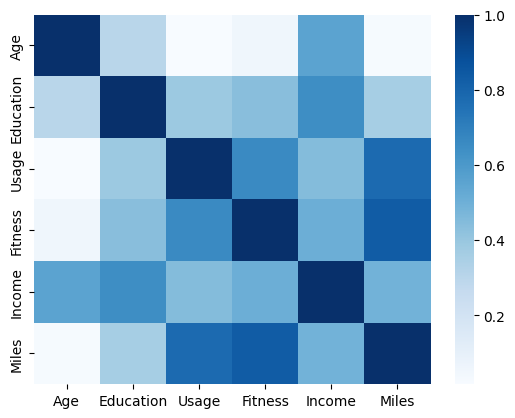

In [10]:
sns.heatmap(data=df1[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr(), cmap='Blues')
plt.show()

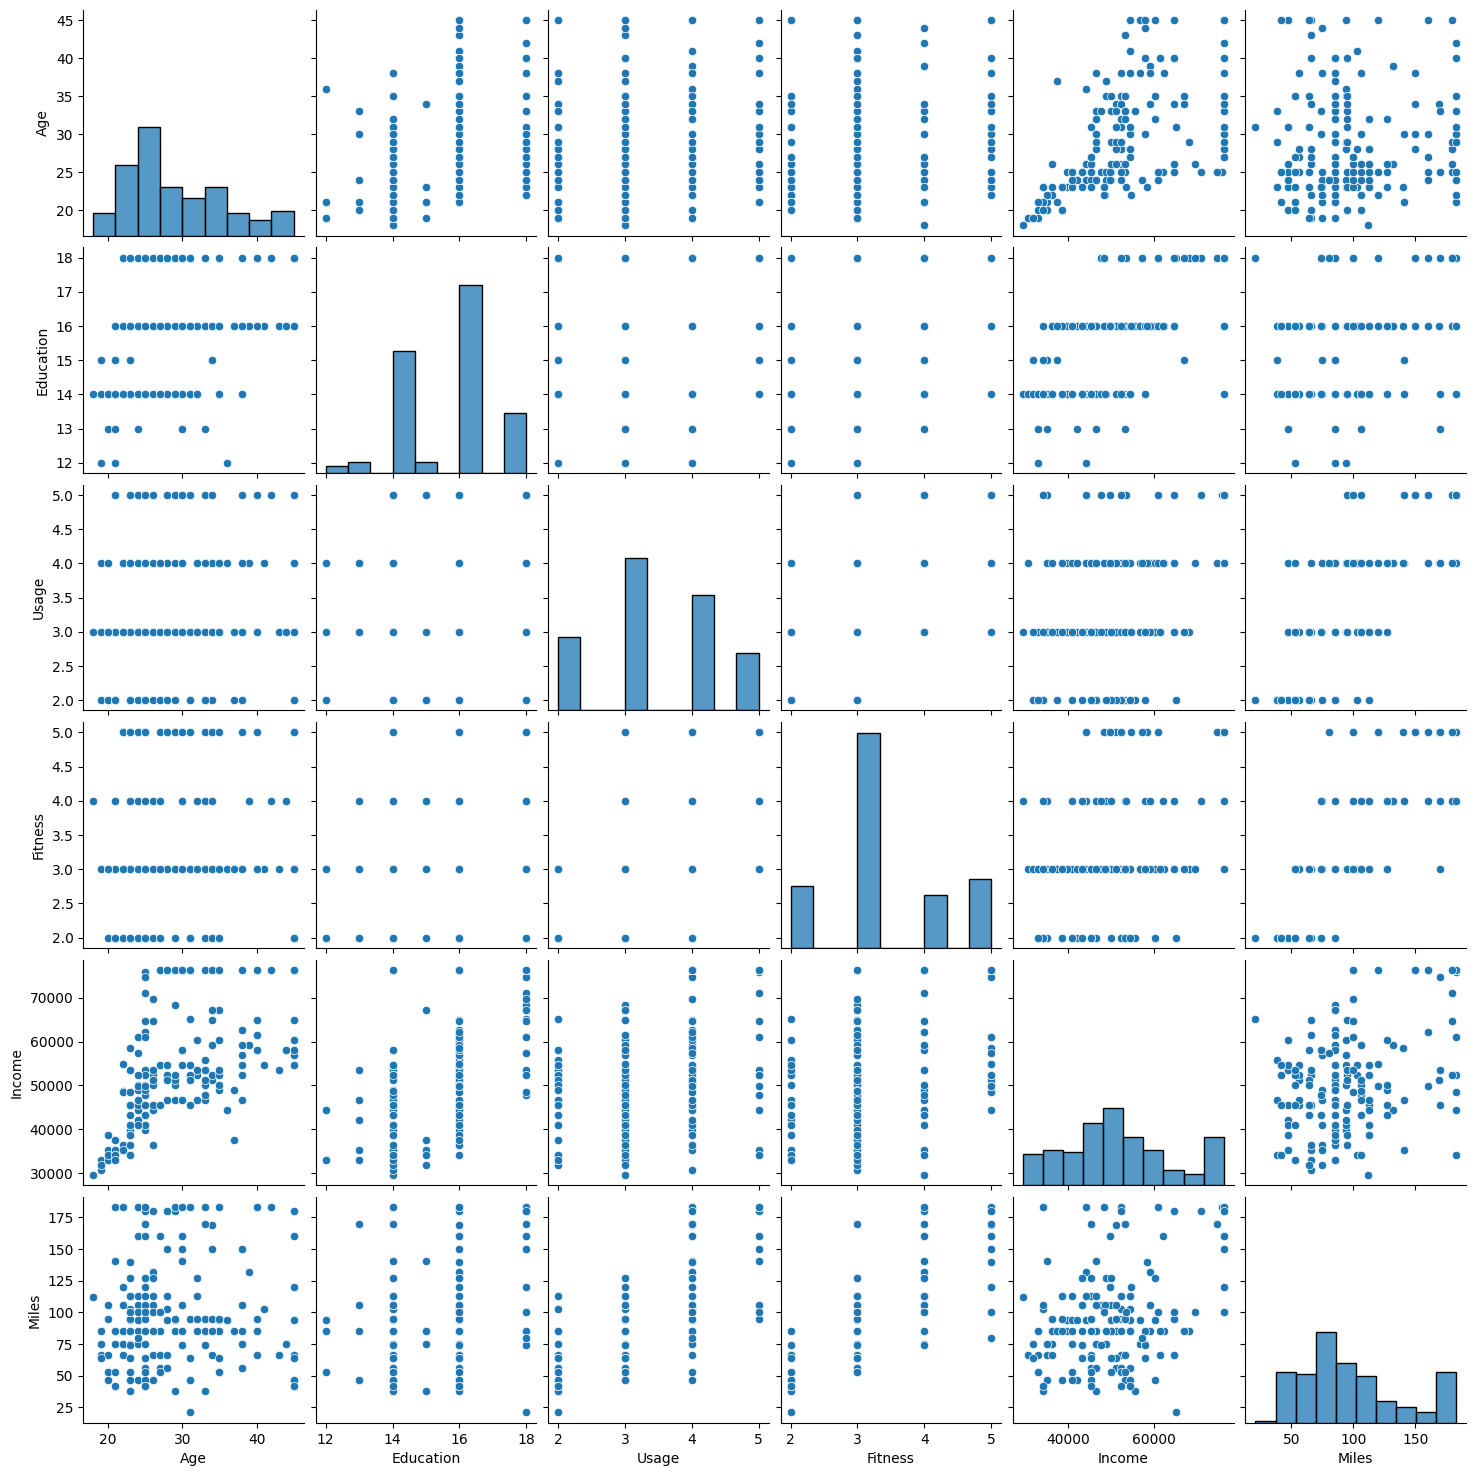

In [11]:
sns.pairplot(data=df1)
plt.show()

## Conclusion and Insights:<br>
 - Income and Education: There is a strong positive correlation (0.65) between income and education. This suggests that individuals with higher levels of education tend to have higher incomes.<br>
 - Fitness and Usage: There is a strong positive correlation (0.66) between fitness and usage. This implies that individuals who use fitness-related products or services tend to be more fitness-conscious. <br>
 - Fitness and Miles: There is a very strong positive correlation (0.83) between fitness and miles. This indicates that individuals who are more fitness-conscious tend to cover more miles, likely indicating higher levels of physical activity. <br>
 - Usage and Miles: There is a strong positive correlation (0.78) between usage and miles. This suggests that individuals who use a particular product or service tend to cover more miles, potentially indicating frequent usage or engagement with the product/service. <br>
 - Income and Age: There is a moderate positive correlation (0.55) between income and age. This implies that older individuals tend to have higher incomes, which could be due to factors such as career advancement or accumulation of wealth over time.

In [12]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Column-wise Analysis

In [13]:
df1.Product.value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [14]:
df1.Age.value_counts()

Age
25    25
23    18
24    12
26    12
28     9
45     8
35     8
33     8
38     7
21     7
22     7
27     7
30     7
29     6
34     6
31     6
40     5
20     5
19     4
32     4
37     2
43     1
44     1
18     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [15]:
df1.Gender.value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [16]:
df1.Education.value_counts()

Education
16    85
14    55
18    27
15     5
13     5
12     3
Name: count, dtype: int64

In [17]:
df1.MaritalStatus.value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [18]:
df1.Usage.value_counts()

Usage
3    69
4    52
2    33
5    26
Name: count, dtype: int64

In [19]:
df1.Fitness.value_counts()

Fitness
3    97
5    31
2    28
4    24
Name: count, dtype: int64

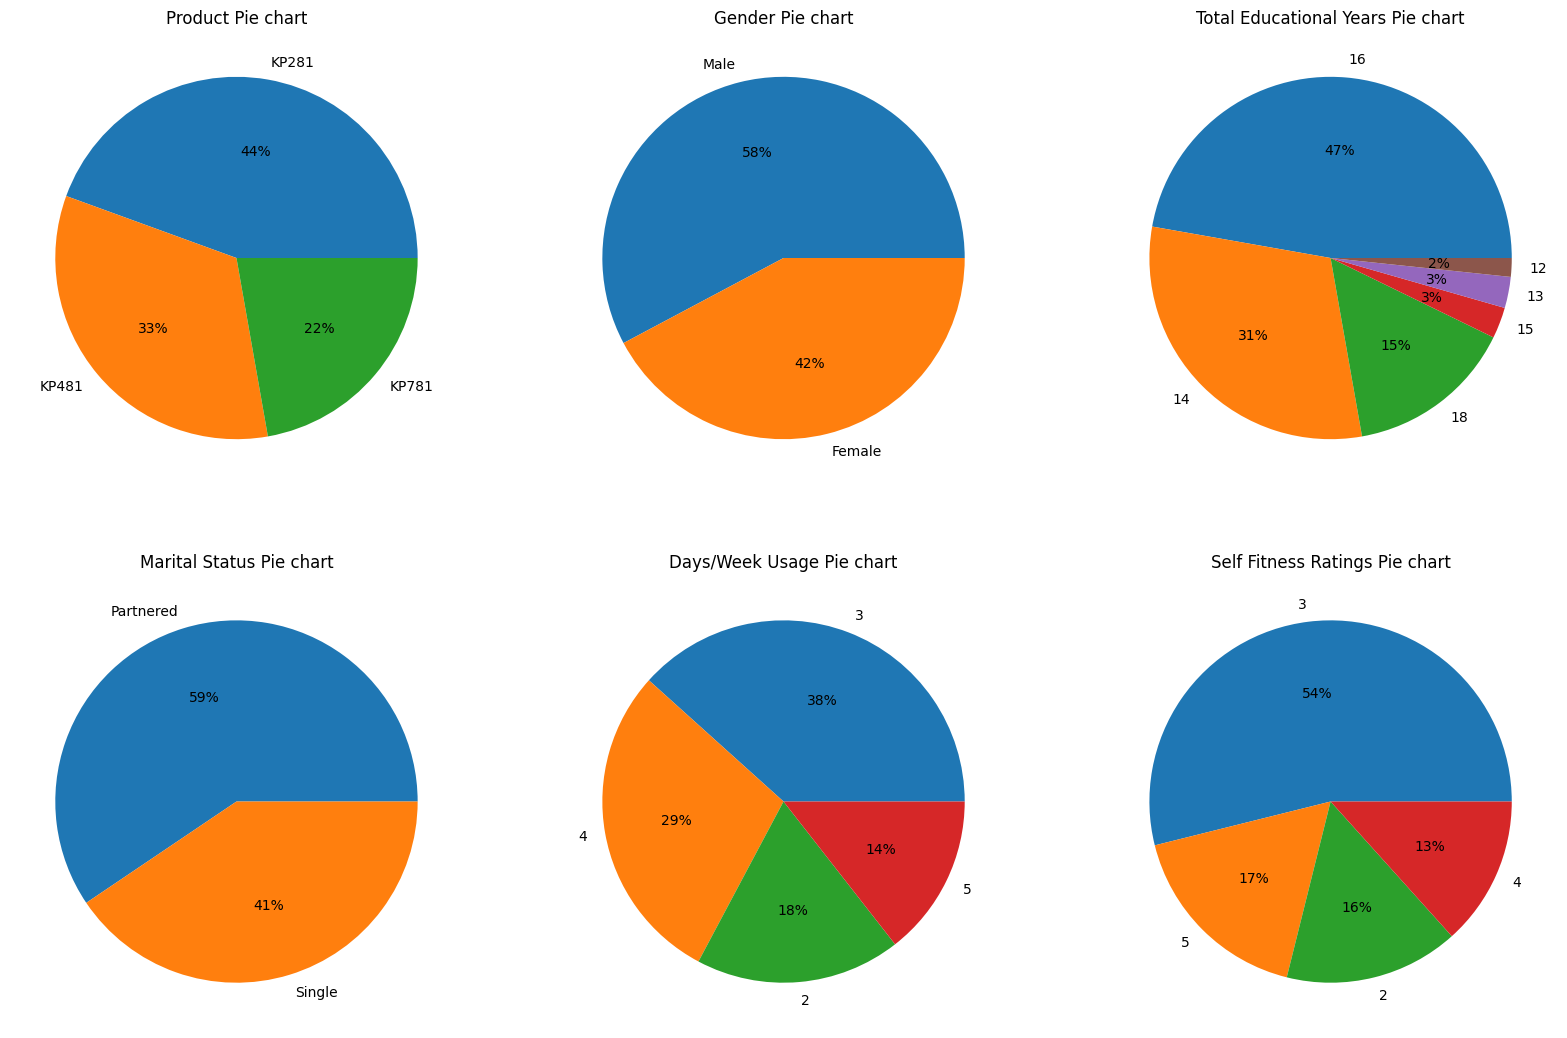

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.pie(df1.Product.value_counts(), labels=df1.Product.value_counts().index, autopct='%.0f%%')
plt.title('Product Pie chart')
plt.subplot(3,3,2)
plt.pie(df1.Gender.value_counts(), labels=df1.Gender.value_counts().index, autopct='%.0f%%')
plt.title('Gender Pie chart')
plt.subplot(3,3,3)
plt.pie(df1.Education.value_counts(), labels=df1.Education.value_counts().index, autopct='%.0f%%')
plt.title('Total Educational Years Pie chart')
plt.subplot(3,3,4)
plt.pie(df1.MaritalStatus.value_counts(), labels=df1.MaritalStatus.value_counts().index, autopct='%.0f%%')
plt.title('Marital Status Pie chart')
plt.subplot(3,3,5)
plt.pie(df1.Usage.value_counts(), labels=df1.Usage.value_counts().index, autopct='%.0f%%')
plt.title('Days/Week Usage Pie chart')
plt.subplot(3,3,6)
plt.pie(df1.Fitness.value_counts(), labels=df1.Fitness.value_counts().index, autopct='%.0f%%')
plt.title('Self Fitness Ratings Pie chart')
plt.show()

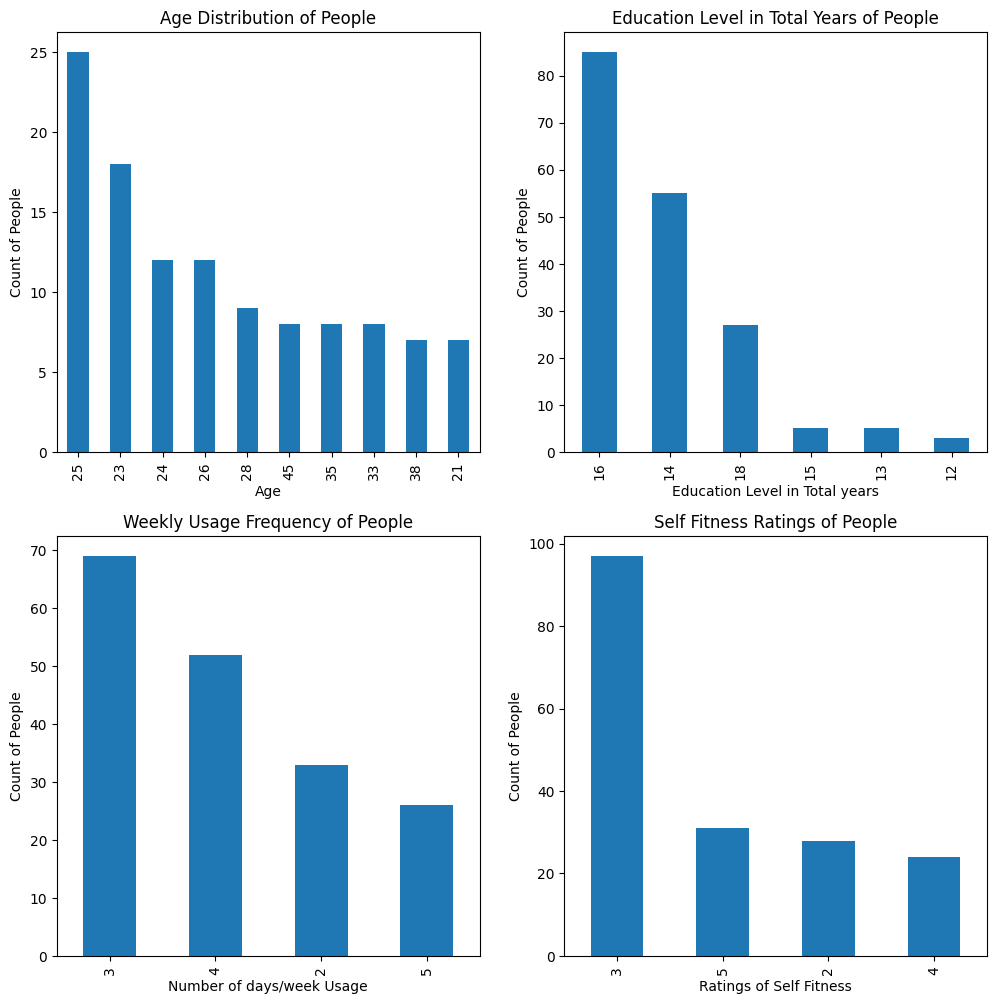

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
df1.Age.value_counts().head(10).plot(kind='bar')
plt.title('Age Distribution of People')
plt.ylabel('Count of People')
plt.subplot(2,2,2)
df1.Education.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Education Level in Total Years of People')
plt.xlabel('Education Level in Total years')
plt.subplot(2,2,3)
df1.Usage.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Weekly Usage Frequency of People')
plt.xlabel('Number of days/week Usage')
plt.subplot(2,2,4)
df1.Fitness.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Self Fitness Ratings of People')
plt.xlabel('Ratings of Self Fitness')
plt.show()

### Analysis
 - Product Preferences: The KP281 treadmill seems to be the most popular choice among customers, with 80 units sold, followed by KP481 (60 units) and KP781 (40 units). This indicates a potential demand for features or price points offered by the KP281 model.
 - Age: Customers aged 25 and 23 represent the largest segments, followed by ages 24, 26, and 28. This suggests that the target demographic for these treadmills is primarily younger adults.
 - Gender: Males account for a larger portion of sales (104 units) compared to females (76 units). The company may want to explore marketing strategies to attract more female customers.
 - Education: Majority of customers have completed 16 years of education, followed by 14 and 18 years. This could indicate that customers with higher education levels are more likely to purchase these treadmills.
 - Marital Status: Partnered individuals (107 units) seem to purchase more treadmills compared to single individuals (73 units). This could imply that partnered individuals are more inclined towards fitness or have higher disposable income for such purchases.
 - Usage: Most customers use the treadmills for 3 or 4 times a week, with fewer users engaging in more frequent usage. This information can guide the company in designing features tailored to these usage patterns.
 - Fitness Level: Customers with a fitness level of 3 represent the largest segment, followed by level 5. This indicates that the treadmills are attracting customers with moderate to high fitness levels, suggesting the treadmills cater well to fitness enthusiasts.
### Recommendation
 - Develop marketing campaigns targeting females and single individuals to potentially increase sales in these demographics.
 - Consider incorporating features or pricing strategies that appeal to a broader age range to capture older customers.
 - Offer programs or incentives to encourage more frequent usage, potentially increasing customer satisfaction and loyalty.
 - Educate potential customers about the benefits of using treadmills for fitness, especially targeting demographics with lower fitness levels.

# Product-Wise Deep Analysis

In [22]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,18,Single,5,5,76331,183
176,KP781,42,Male,18,Single,5,4,76331,183
177,KP781,45,Male,16,Single,5,5,76331,160
178,KP781,45,Male,18,Partnered,4,5,76331,120


In [23]:
pd.crosstab(df1.Product, df1.Age, margins=True)

Age,18,19,20,21,22,23,24,25,26,27,...,37,38,39,40,41,42,43,44,45,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,5,7,7,3,...,1,4,1,1,1,0,1,1,3,80
KP481,0,1,3,3,0,7,3,11,3,1,...,1,2,0,3,0,0,0,0,2,60
KP781,0,0,0,0,3,3,4,7,2,3,...,0,1,0,1,0,1,0,0,3,40
All,1,4,5,7,7,18,12,25,12,7,...,2,7,1,5,1,1,1,1,8,180


This representation doesn't look good so we are going to sub-group the age in 3 levels: Youth, Prime, Active for better analysis

In [24]:
#Temp for Age grouping
def temp(x):
    if x<26:
        return 'Youthful Explorers'
    elif x>35:
        return 'Prime Trailblazers'
    else:
        return 'Active Achievers'

In [25]:
df1['Age_groups']=df1.Age.apply(temp)
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups
0,KP281,18,Male,14,Single,3,4,29562,112,Youthful Explorers
1,KP281,19,Male,15,Single,2,3,31836,75,Youthful Explorers
2,KP281,19,Female,14,Partnered,4,3,30699,66,Youthful Explorers
3,KP281,19,Male,12,Single,3,3,32973,85,Youthful Explorers
4,KP281,20,Male,13,Partnered,4,2,35247,47,Youthful Explorers
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,18,Single,5,5,76331,183,Prime Trailblazers
176,KP781,42,Male,18,Single,5,4,76331,183,Prime Trailblazers
177,KP781,45,Male,16,Single,5,5,76331,160,Prime Trailblazers
178,KP781,45,Male,18,Partnered,4,5,76331,120,Prime Trailblazers


Young Explorers: Ages 18-25 <br>
Active Achievers: Ages 26-35 <br>
Prime Trailblazers: Ages 36-45

In [26]:
pd.crosstab(df1.Product, df1.Age_groups, margins=True)

Age_groups,Active Achievers,Prime Trailblazers,Youthful Explorers,All
Product,,,,
KP281,32,14,34,80
KP481,24,8,28,60
KP781,17,6,17,40
All,73,28,79,180


In [27]:
pd.crosstab(df1.Product, df1.Age_groups, margins=True, normalize=True)

Age_groups,Active Achievers,Prime Trailblazers,Youthful Explorers,All
Product,,,,
KP281,0.177778,0.077778,0.188889,0.444444
KP481,0.133333,0.044444,0.155556,0.333333
KP781,0.094444,0.033333,0.094444,0.222222
All,0.405556,0.155556,0.438889,1.000000


In [28]:
pd.crosstab(df1.Product, df1.Age_groups, margins=True, normalize='index')

Age_groups,Active Achievers,Prime Trailblazers,Youthful Explorers
Product,,,
KP281,0.400000,0.175000,0.425000
KP481,0.400000,0.133333,0.466667
KP781,0.425000,0.150000,0.425000
All,0.405556,0.155556,0.438889


In [29]:
pd.crosstab(df1.Product, df1.Age_groups, margins=True, normalize='columns')

Age_groups,Active Achievers,Prime Trailblazers,Youthful Explorers,All
Product,,,,
KP281,0.438356,0.500000,0.43038,0.444444
KP481,0.328767,0.285714,0.35443,0.333333
KP781,0.232877,0.214286,0.21519,0.222222


We can conclude that 44.44% of total cosumers will buy KP281 and out of which 40% will be Active Achievers, 17.5% will be Prime Trailblazers and 42.5% are Youthful Explorers

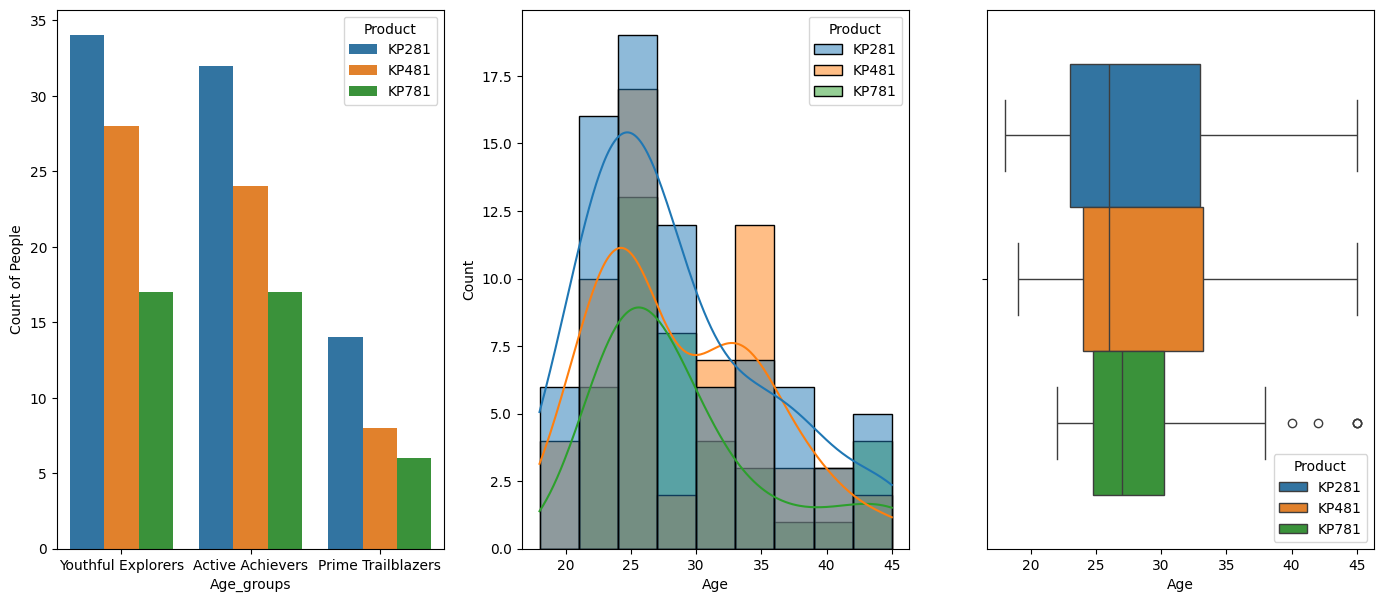

In [30]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Age_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Age', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Age', hue='Product')
plt.show()

### Analysis and Insights: 
**Overall Distribution:**
- The total number of customers across all age groups for all products is 180.
- The percentage distribution of customers across age groups shows that Youthful Explorers form the largest segment, followed by Active Achievers and then Prime Trailblazers.

**Product-wise Distribution:**
- KP281: This product has the highest number of customers across all age groups compared to the other two products, indicating it might have broader appeal or better marketing reach compared to the other products.
- KP481: While having fewer customers overall, it still maintains a considerable presence across different age groups, suggesting it has its own niche or specific target audience. Further analysis is needed to understand why it attracts fewer customers across other age groups.
- KP781: This product has the fewest customers, with the majority being Youthful Explorers and some exception which are at the Prime Trailbrazers group

### Recommendations:
- Targeted Marketing: Tailor marketing strategies to each age group's preferences. Highlight different product features and benefits that resonate with each segment. Invest more in reaching out to the Active Achievers segment, as they represent a potentially untapped market for growth.
- Product Development: Consider adjusting product features or branding to appeal to specific age groups where the product is underperforming. Conduct market research to understand why KP781 is less popular among certain age groups and make necessary improvements or adjustments.
- Diversification: Explore opportunities to diversify product offerings to cater to a wider range of age groups and preferences. Introduce product bundles or packages that appeal to multiple age groups simultaneously.

In [31]:
pd.crosstab(df1.Product, df1.Education, margins=True)

Education,12,13,14,15,16,18,All
Product,,,,,,,
KP281,2,3,30,4,39,2,80
KP481,1,2,23,1,31,2,60
KP781,0,0,2,0,15,23,40
All,3,5,55,5,85,27,180


In [32]:
pd.crosstab(df1.Product, df1.Education, margins=True, normalize=True)

Education,12,13,14,15,16,18,All
Product,,,,,,,
KP281,0.011111,0.016667,0.166667,0.022222,0.216667,0.011111,0.444444
KP481,0.005556,0.011111,0.127778,0.005556,0.172222,0.011111,0.333333
KP781,0.000000,0.000000,0.011111,0.000000,0.083333,0.127778,0.222222
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.150000,1.000000


In [33]:
pd.crosstab(df1.Product, df1.Education, margins=True, normalize='index')

Education,12,13,14,15,16,18
Product,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.575000
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.150000


In [34]:
pd.crosstab(df1.Product, df1.Education, margins=True, normalize='columns')

Education,12,13,14,15,16,18,All
Product,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.074074,0.444444
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.074074,0.333333
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.851852,0.222222


44.44% of total cosumers will buy the KP281, out of which consumers with Educational level/Years 16 has the most probability to buy it which is being 48.75% and lowest is for level/years of 12 and 18 

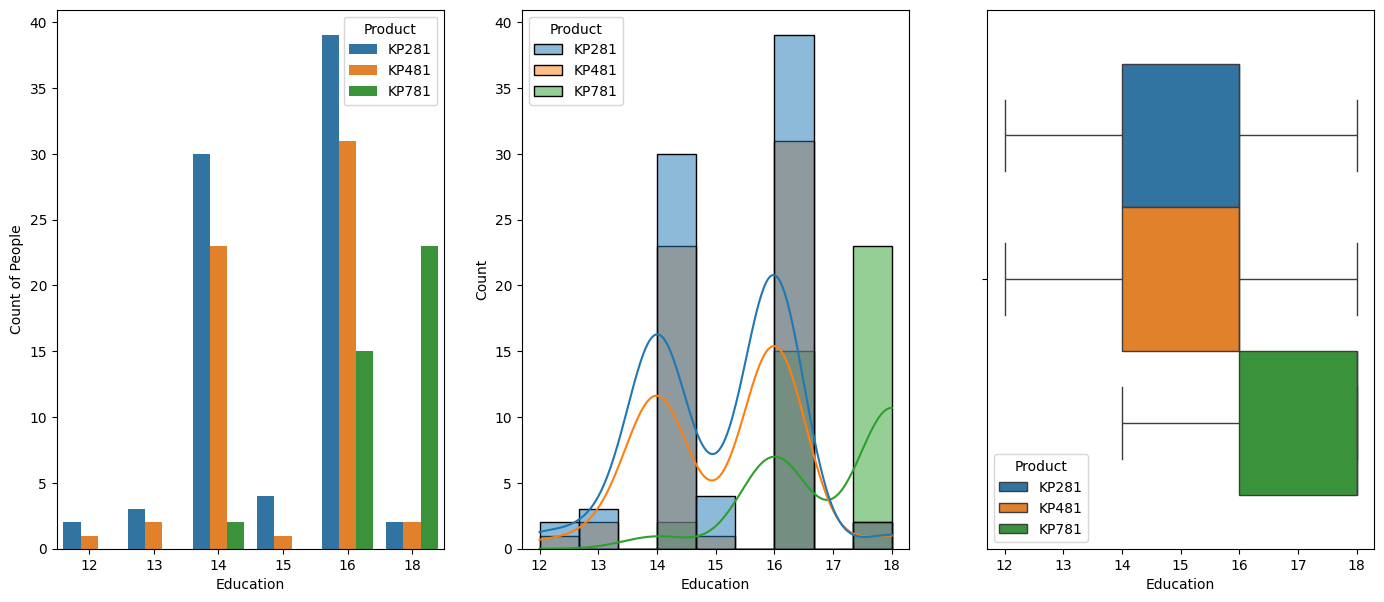

In [35]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Education', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Education', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Education', hue='Product')
plt.show()

### Analysis:<br>
**Product Distribution Across Education Levels:**<br>
- KP281: Shows a steady increase from education levels 12 to 16, then slightly dips at 18.<br>
- KP481: Similar to KP281 but with a slightly smaller distribution.<br>
- KP781: Low distribution until education level 16, where it sees a significant rise.<br>
**Total Distribution Across Education Levels:** Overall, there's an increasing trend in product distribution with the progression of education levels. Education level 16 has the highest overall distribution followed by 14 and 18.<br>
**Normalized Distribution:** The normalized distribution provides a clearer picture of the proportional representation of each product across education levels. KP281 and KP481 dominate the distribution, especially at education level 16. KP781 has a relatively lower but still noticeable presence, particularly at education level 18.<br>

### Insights:<br>
- There's a notable shift in product preferences as education level progresses, with KP281 and KP481 being preferred at higher education levels. Also both the product seems to have successfully penetrated the market across various education levels and there is a dominance of both at education level 16 indicates a higher demand for these products among students at that stage.<br>
- KP781 gains traction in the later education years, suggesting it might cater to more advanced educational needs and shows potential for growth, particularly in higher education levels where it gains prominence and suggests a specific need or niche market within higher education institutions.

### Recommendations:<br>
- Allocate more marketing resources towards KP281 and KP481 to maintain their stronghold, especially at education level 16. Invest in targeted marketing campaigns for KP781 to capitalize on its rising popularity at education level 18. <br>
- Conduct market research to identify specific features or functionalities that appeal to users at different education levels. Consider diversifying product offerings to cater to a broader range of educational needs and preferences.<br>

In [36]:
pd.crosstab(df1.Product, df1.Usage, margins=True)

Usage,2,3,4,5,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


In [37]:
pd.crosstab(df1.Product, df1.Usage, margins=True, normalize=True)

Usage,2,3,4,5,All
Product,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.333333
KP781,0.000000,0.005556,0.100000,0.116667,0.222222
All,0.183333,0.383333,0.288889,0.144444,1.000000


In [38]:
pd.crosstab(df1.Product, df1.Usage, margins=True, normalize='index')

Usage,2,3,4,5
Product,,,,
KP281,0.237500,0.462500,0.275000,0.025000
KP481,0.233333,0.516667,0.200000,0.050000
KP781,0.000000,0.025000,0.450000,0.525000
All,0.183333,0.383333,0.288889,0.144444


In [39]:
pd.crosstab(df1.Product, df1.Usage, margins=True, normalize='columns')

Usage,2,3,4,5,All
Product,,,,,
KP281,0.575758,0.536232,0.423077,0.076923,0.444444
KP481,0.424242,0.449275,0.230769,0.115385,0.333333
KP781,0.000000,0.014493,0.346154,0.807692,0.222222


Probability to buy KP281 is 44.44% of total consumers, out of which cosumers who are using 3 days/week are most to buy it which is being 46.25%

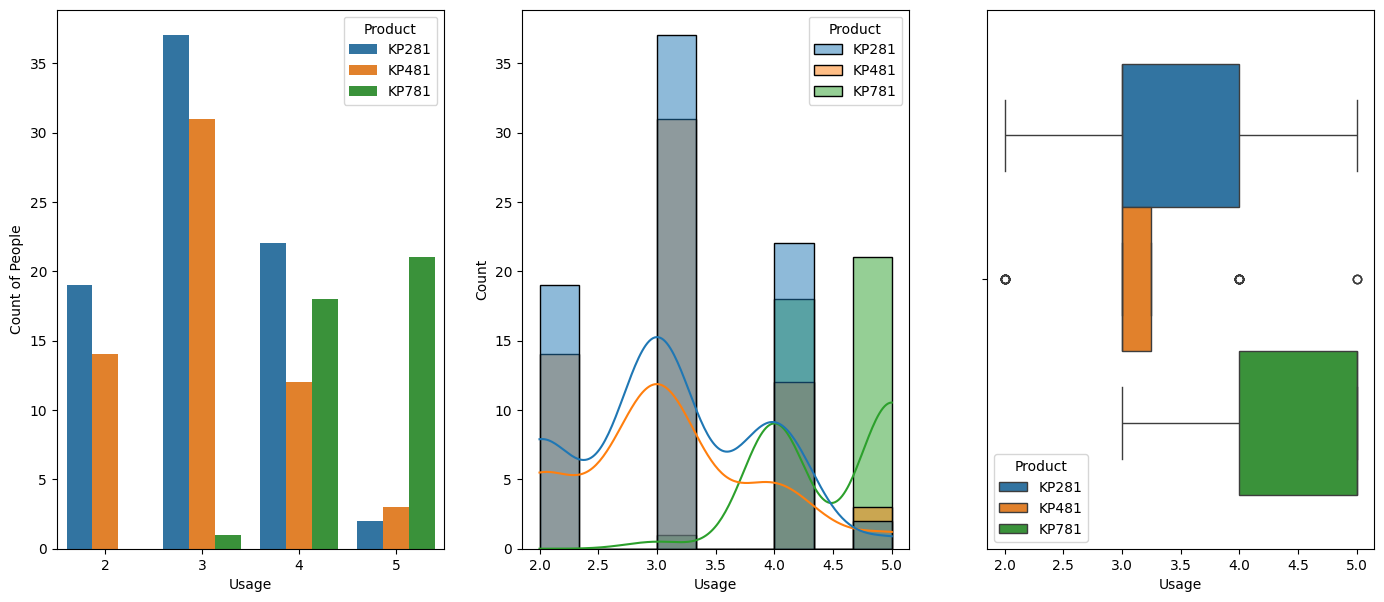

In [40]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Usage', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Usage', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Usage', hue='Product')
plt.show()

### Analysis of Product Usage Distribution:<br>
- The table shows the usage of three different products (KP281, KP481, KP781) across different usage frequencies (2, 3, 4, 5 days/week).<br>
- The totals across all usage frequencies are also provided for each product.<br>

### Insights:
- KP281: This product has the highest overall usage, with 80 instances reported across all frequencies. It is most commonly used for 3 days a week (37 instances), followed by 2 days a week (19 instances).<br>
- KP481: The second most used product with a total of 60 instances. Similar to KP281, it is also most commonly used for 3 days a week (31 instances).<br>
Both products exhibit similar usage distributions, with the highest proportions for 3 days a week, followed by 2 days a week. This suggests a consistent pattern of usage for these products.<br>
- KP781: This product has the lowest overall usage, with only 40 instances reported across all frequencies. Notably, it is primarily used for 4 and 5 days a week, with a total of 39 instances. Unlike KP281 and KP481, KP781 shows a more varied usage distribution, with significant proportions for both 4 and 5 days a week, indicating a different usage pattern compared to the other products.<br>

### Recommendations:<br>
- **KP281 & KP481:** Focus marketing efforts, production optimization, and inventory management on KP281 and KP481, the most frequently used products. Investigate the reasons behind their popularity (effectiveness, affordability, unique features) to understand how to capitalize on their success. Conduct customer surveys or market research to identify areas for improvement and unmet needs.<br>
- **KP781:** KP781 has consistent usage across 4 and 5 days a week, indicating a niche market. Explore ways to expand the market by highlighting unique benefits or targeting specific customer segments. Consider adjusting marketing strategies or product positioning to better communicate the value proposition. Monitor customer feedback to ensure KP781 meets target audience needs.

In [41]:
pd.crosstab(df1.Product, df1.Income, margins=True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,64809,65220,67083,68220,69721,70966,74701,75946,76331,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,1,1,3,2,5,3,2,3,2,...,1,0,1,1,0,0,0,0,0,80
KP481,0,0,1,2,3,0,1,0,2,0,...,2,1,1,0,0,0,0,0,0,60
KP781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,20,40
All,1,1,2,5,5,5,4,2,5,2,...,3,1,2,1,1,1,1,1,20,180


In [42]:
#Temp Function for Income grouping
def temp_i(x):
    if x<45001:
        return 'Low-Medium'
    elif x>60000:
        return 'High'
    else:
        return 'Medium-High'

In [43]:
df1['Income_groups']=df1.Income.apply(temp_i)

Low-Medium Income: Income range from 29562 to 45000 <br>
Medium-High Income: Income range from 45001 to 60000 <br>
High Income: Income range from 60001 to 76331

In [44]:
pd.crosstab(df1.Product, df1.Income_groups, margins=True)

Income_groups,High,Low-Medium,Medium-High,All
Product,,,,
KP281,6,34,40,80
KP481,7,15,38,60
KP781,29,0,11,40
All,42,49,89,180


In [45]:
pd.crosstab(df1.Product, df1.Income_groups, margins=True, normalize=True)

Income_groups,High,Low-Medium,Medium-High,All
Product,,,,
KP281,0.033333,0.188889,0.222222,0.444444
KP481,0.038889,0.083333,0.211111,0.333333
KP781,0.161111,0.000000,0.061111,0.222222
All,0.233333,0.272222,0.494444,1.000000


In [46]:
pd.crosstab(df1.Product, df1.Income_groups, margins=True, normalize='index')

Income_groups,High,Low-Medium,Medium-High
Product,,,
KP281,0.075000,0.425000,0.500000
KP481,0.116667,0.250000,0.633333
KP781,0.725000,0.000000,0.275000
All,0.233333,0.272222,0.494444


In [47]:
pd.crosstab(df1.Product, df1.Income_groups, margins=True, normalize='columns')

Income_groups,High,Low-Medium,Medium-High,All
Product,,,,
KP281,0.142857,0.693878,0.449438,0.444444
KP481,0.166667,0.306122,0.426966,0.333333
KP781,0.690476,0.000000,0.123596,0.222222


Probability to buy KP281 is 44.44% of total consumers, out of which cosumers who have Medium-High Income are the most to buy it which is being 50% and follwed by Low-Medium Income group being 42.50%

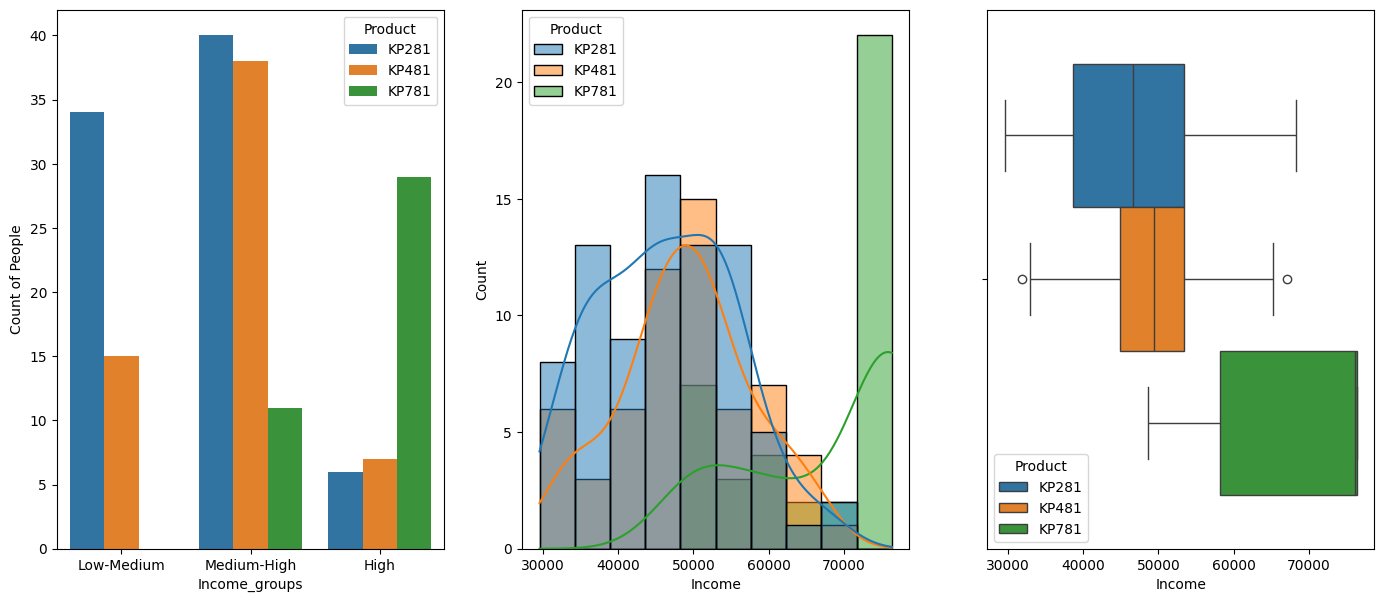

In [48]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Income_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Income', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Income', hue='Product')
plt.show()

### Analysis:
- KP281: This product has a relatively balanced distribution across income groups, with a significant portion of sales in the Medium-High income group.<br>
- KP481: It shows a similar pattern to KP281, with a substantial share of sales in the Medium-High income group but with fewer sales overall compared to KP281.<br>
- KP781: This product is mainly favored by the High-income group, with minimal to no sales recorded in the Low-Medium income group.<br>
**Overall Sales Distribution:** The majority of sales come from the Medium-High income group, followed by Low-Medium and High-income groups, in descending order.<br>

### Insights:
- **Income Group Preferences:** Products KP281 and KP481 seem to cater well to a wider income range, with a notable presence in both Medium-High and High-income groups. KP781 appears to be a premium product, targeting specifically the High-income group. There's room for expansion in the Medium-High income segment.<br>
- **Market Potential:** The data suggests untapped potential in the Low-Medium income group, especially for products like KP281 and KP481. There might be opportunities for targeted marketing or pricing strategies to attract this segment.<br>
- **Product Portfolio Optimization:** Given the dominance of Medium-High income sales, there's a possibility to introduce new products or variants catering to this segment's preferences to further capitalize on this market share.<br>

### Recommendations:
- **Diversification of Marketing Strategies:** Develop targeted marketing campaigns to appeal to the Low-Medium income segment, highlighting affordability, value for money, or unique selling propositions of products KP281 and KP481.<br>
- **Product Development:** Consider expanding the product range within the Medium-High income segment, focusing on features or benefits that resonate with this demographic's preferences.<br>
- **Price Optimization:** Evaluate pricing strategies to ensure competitiveness across income groups without compromising profitability. Consider discounts, promotions, or bundled offers to attract price-sensitive customers.

In [49]:
pd.crosstab(df1.Product, df1.Miles, margins=True)

Miles,21,38,42,47,53,56,64,66,74,75,...,132,140,141,150,160,169,170,180,183,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,10,0,10,...,2,0,2,0,0,1,0,0,1,80
KP481,1,0,4,0,7,0,6,0,3,0,...,0,0,0,0,0,0,2,0,1,60
KP781,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,5,0,1,6,11,40
All,1,3,4,9,7,6,6,10,3,10,...,2,1,2,4,5,1,3,6,13,180


In [50]:
#Temp function for Miles grouping
def temp_m(x):
    if x<61:
        return 'Short Range'
    elif x>120:
        return 'Long Range'
    else:
        return 'Medium Range'

In [51]:
df1['Miles_groups']=df1.Miles.apply(temp_m)

Short Range Group: 21-60 <br>
Medium Range Group: 61-120 <br>
Long Range Group: 121-183

In [52]:
pd.crosstab(df1.Product, df1.Miles_groups, margins=True)

Miles_groups,Long Range,Medium Range,Short Range,All
Product,,,,
KP281,6,56,18,80
KP481,8,40,12,60
KP781,28,12,0,40
All,42,108,30,180


In [53]:
pd.crosstab(df1.Product, df1.Miles_groups, margins=True, normalize=True)

Miles_groups,Long Range,Medium Range,Short Range,All
Product,,,,
KP281,0.033333,0.311111,0.100000,0.444444
KP481,0.044444,0.222222,0.066667,0.333333
KP781,0.155556,0.066667,0.000000,0.222222
All,0.233333,0.600000,0.166667,1.000000


In [54]:
pd.crosstab(df1.Product, df1.Miles_groups, margins=True, normalize='index')

Miles_groups,Long Range,Medium Range,Short Range
Product,,,
KP281,0.075000,0.700000,0.225000
KP481,0.133333,0.666667,0.200000
KP781,0.700000,0.300000,0.000000
All,0.233333,0.600000,0.166667


In [55]:
pd.crosstab(df1.Product, df1.Miles_groups, margins=True, normalize='columns')

Miles_groups,Long Range,Medium Range,Short Range,All
Product,,,,
KP281,0.142857,0.518519,0.6,0.444444
KP481,0.190476,0.370370,0.4,0.333333
KP781,0.666667,0.111111,0.0,0.222222


Probability to buy KP281 is 44.44% of total consumers, out of which cosumers who running/walking Medium range miles are the most to buy it which is being 70% and lowest is Long range group being  7.5%

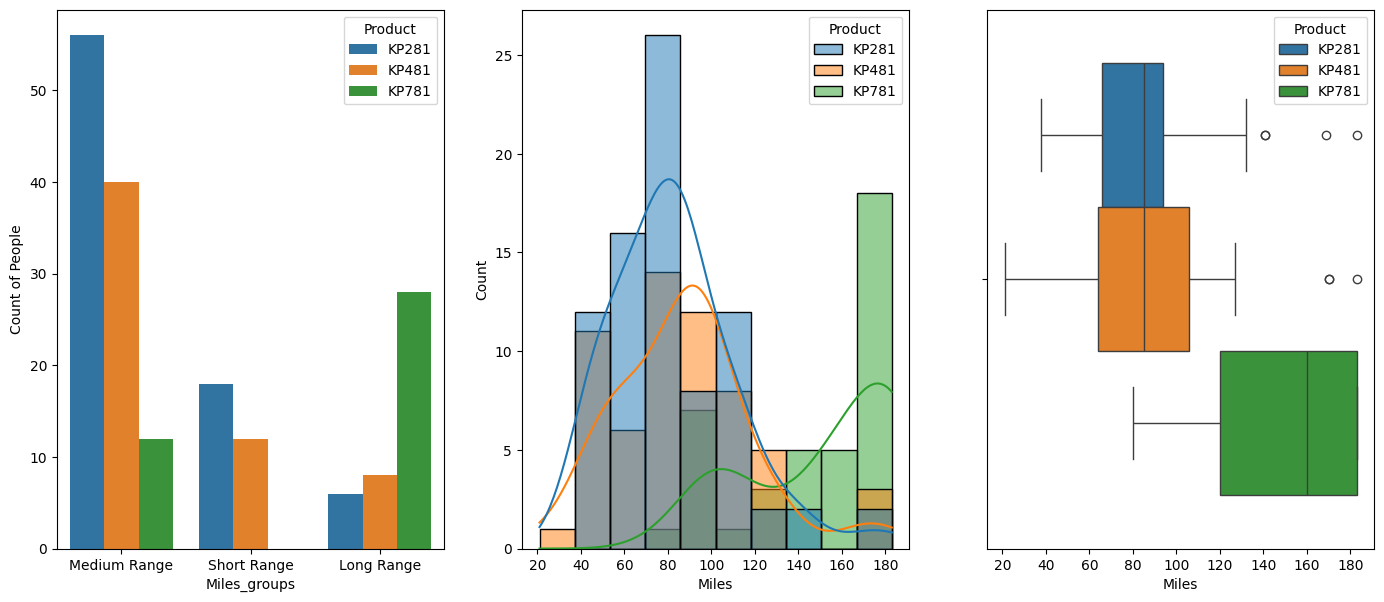

In [56]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Miles_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Miles', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Miles', hue='Product')
plt.show()

### Insights:
- **KP281 Performance:** KP281 has a minimal presence across all mileage ranges. This suggests that it might not be as popular or as well-performing as the other two products in these categories.<br>
- **KP781 Performance:** KP781 shows exceptional performance in the medium range miles group. It might be beneficial to focus marketing efforts on promoting KP781 for medium-range applications.<br>
- **KP481 Performance:** KP481 leads slightly in the short range while being present moderately in other ranges. It could be worth analyzing why KP481 is not performing as well as the others and consider improvements or repositioning in the market.<br><br>
**Overall Distribution:** Long Range products constitute the highest percentage of the total product count (23.33%), followed by Medium Range products (60%) and Short Range products (16.67%). This indicates a significant focus on Medium Range products, followed by Long Range, with less emphasis on Short Range offerings.<br>
**Consistent High Performance:** The box plot indicates that KP781 has a higher median value, suggesting consistent high performance. This could be a selling point when marketing KP781.<br>

### Recommendations:
**Product Development:** Considering the significant portion of products falling into the Medium Range category, there may be an opportunity for product development or enhancement in this segment to cater to the existing demand. Assessing the market demand for Long Range products and potentially investing more resources in this category, especially if there's a growing trend towards longer distance travel.<br>
**Marketing and Sales Strategy:** Tailoring marketing and sales strategies to highlight the strengths of each product in its respective mileage category. For example, emphasizing the endurance and efficiency of Long Range products. Conducting market research to understand customer preferences and trends in different mileage categories, enabling more targeted marketing efforts.

In [57]:
pd.crosstab(df1.Product, df1.Fitness, margins=True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,15,54,9,2,80
KP481,13,39,8,0,60
KP781,0,4,7,29,40
All,28,97,24,31,180


In [58]:
pd.crosstab(df1.Product, df1.Fitness, margins=True, normalize=True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,0.083333,0.300000,0.050000,0.011111,0.444444
KP481,0.072222,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.155556,0.538889,0.133333,0.172222,1.000000


In [59]:
pd.crosstab(df1.Product, df1.Fitness, margins=True, normalize='index')

Fitness,2,3,4,5
Product,,,,
KP281,0.187500,0.675000,0.112500,0.025000
KP481,0.216667,0.650000,0.133333,0.000000
KP781,0.000000,0.100000,0.175000,0.725000
All,0.155556,0.538889,0.133333,0.172222


In [60]:
pd.crosstab(df1.Product, df1.Fitness, margins=True, normalize='columns')

Fitness,2,3,4,5,All
Product,,,,,
KP281,0.535714,0.556701,0.375000,0.064516,0.444444
KP481,0.464286,0.402062,0.333333,0.000000,0.333333
KP781,0.000000,0.041237,0.291667,0.935484,0.222222


Probability to buy KP281 is 44.44% of total consumers, out of which cosumers who are self rating with 3 on health are the most to buy it which is being 67.5% and lowest is 5 rated consumers being 2.5%

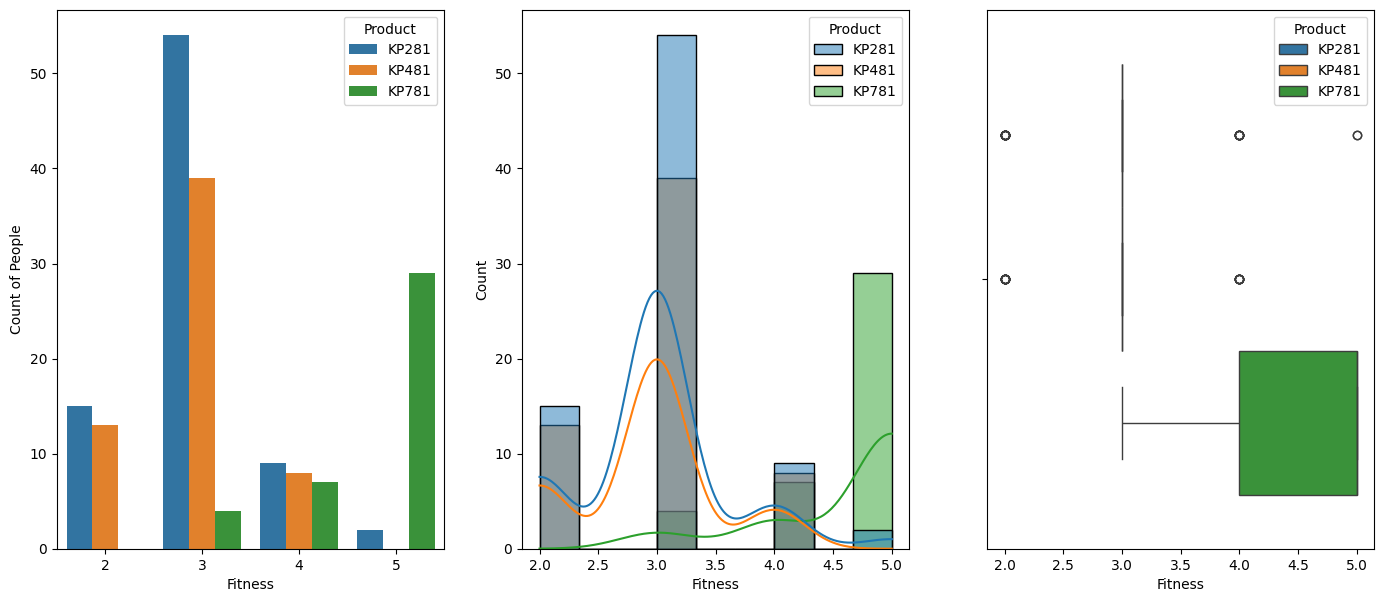

In [61]:
plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Fitness', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Fitness', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Fitness', hue='Product')
plt.show()

### Analysis:
- **KP281:**  Most respondents rated their fitness level as 3, followed by 2 and 4. Very few rated themselves as 5. KP281 has the highest count at level 2; product counts decrease as fitness levels increase. This suggests that it might not be as popular or as well-performing as the other two products in these categories. It could be beneficial to investigate why KP281’s performance is lagging behind the other products.<br>
- **KP481:** Similar to KP281, most respondents rated their fitness level as 3, followed by 2 and 4. There were no respondents who rated themselves as 5. KP481 shows moderate counts across all fitness levels but peaks at level 3. It could be worth analyzing why KP481 is not performing as well as KP781 and consider improvements or repositioning in the market.<br>
- **KP781:** Here, the majority of respondents rated their fitness level as 5, followed by 3. There were very few ratings of 4 and none for 2. KP781 shows exceptional performance at a fitness level of 3 across all three graphs. It might be beneficial to focus marketing efforts on promoting KP781 for applications requiring higher fitness levels.<br>
**Overall Fitness Distribution:** Across all products, most respondents rated themselves as 3, followed by 2 and 5. There were fewer respondents who rated themselves as 4.<br>
### Insights:
- **Product Performance Perception:** The ratings suggest that different products might have different impacts or perceived benefits on fitness levels. For instance, KP781 seems to be associated with higher self-reported fitness levels compared to the other products.<br>
- **Gap in High Fitness Perception:** There's a noticeable gap in the perception of high fitness levels (rating 5) across products. While KP781 has a significant portion of respondents rating themselves as 5, KP281 and KP481 have very few or none at all. This could indicate differing effectiveness or marketing strategies between the products.<br>
- **Consistency in Mid-level Ratings:** Across all products, the most common fitness rating is 3. This suggests a consistent perception of average fitness levels among respondents regardless of the product used.<br>

### Recommendations:
- **Product Improvement:** Analyze what aspects of KP781 contribute to higher fitness perception and consider incorporating similar features or strategies into other products to enhance their perceived effectiveness.<br>
- **Marketing Adjustments:** Tailor marketing strategies to highlight specific fitness benefits associated with each product. For instance, emphasize endurance and strength gains for KP781, while focusing on overall health improvements for KP281 and KP481.<br>
- **Diversification:** Consider diversifying product offerings to cater to different fitness goals and preferences. This could involve introducing new formulations or variations tailored to specific demographics or fitness objectives.<br>

In [62]:
pd.crosstab(df1.Product, df1.Gender, margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [63]:
pd.crosstab(df1.Product, df1.Gender, margins=True, normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [64]:
pd.crosstab(df1.Product, df1.Gender, margins=True, normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


In [65]:
pd.crosstab(df1.Product, df1.Gender, margins=True, normalize='columns')

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


#### Product profiling
Out of total consumers, probability to buy KP281 is 44.44%, KP481 is 33.33% and KP2781 is 22.22%.
- KP281 (44.44%): Out of given probability of the product purchase, There is 50% probability of male and female to buy the product.
- KP481 (33.33%): Out of given probability of the product purchase, Male has slighly more preference to buy this product being 51.67%.
- KP781 (22.22%): Out of given probability of the product purchase, 82.50% Male consumer will buy this prodruct which is the most.

#### Consumer Profiling:
Out of total consumers, male has higher chance to buy the product being 57.78% as compared to female being 42.22%
- Male's preference to buy the products are KP281>KP781>KP481, which are being 38.46%, 31.73% and 29.80% respectively
- Female will prefer KP281 the most to purchase being 52.63% and KP781 the least being 9.21% 

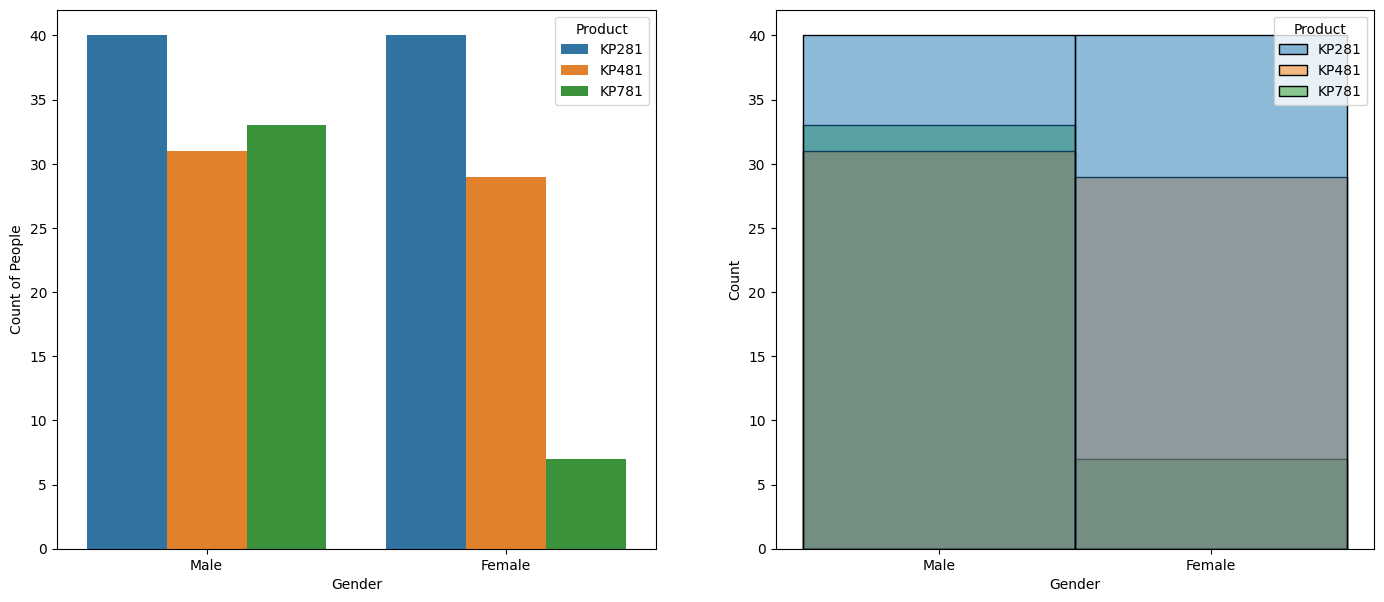

In [66]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.countplot(data=df1, x='Gender', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,2,2)
sns.histplot(data=df1, x='Gender', hue='Product')
plt.show()

### Insights:
**Gender Distribution:** The data shows that there were 76 female purchases and 104 male purchases, totaling 180 purchases overall. Males account for 57.78% of total purchases, while females account for 42.22%. This indicates that the product appeals slightly more to male customers.<br>

**Product Performance:**<br>
- **KP281:** This product has the highest sales, with 80 units sold. The gender distribution is equal, indicating its popularity among both genders.
- **KP481:** With 60 units sold, it's the second most popular product. The gender distribution is also fairly balanced.
- **KP781:** This product has the lowest sales volume, with only 40 units sold. However, it's notable that it has a higher proportion of male customers compared to females.
### Recommendations:
- **Targeted Marketing:** Since there's a gender discrepancy in the popularity of certain products (like KP781), consider tailoring marketing strategies to appeal more to the gender that's less represented in the sales for each product.
- **Product Improvement:** Analyze why certain products are less popular among one gender. If there are specific features or aspects that appeal more to one gender, consider making adjustments to the product design or marketing to broaden its appeal.
- **Diversification:** While KP281 and KP481 seem to be performing well, consider expanding the product line to attract a more diverse customer base. Introducing new products with different features or price points could help capture additional market segments.

In [67]:
pd.crosstab(df1.Product, df1.MaritalStatus, margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [68]:
pd.crosstab(df1.Product, df1.MaritalStatus, margins=True, normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [69]:
pd.crosstab(df1.Product, df1.MaritalStatus, margins=True, normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [70]:
pd.crosstab(df1.Product, df1.MaritalStatus, margins=True, normalize='columns')

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


#### Product profiling
Out of total consumers, probability to buy KP281 is 44.44%, KP481 is 33.33% and KP2781 is 22.22%.
- It seems like for each product, Partnered consumers is higher purchasing preference as to Single consumers. 

#### Consumer Profiling:
Out of total consumers, Partnered has higher chance to buy the product being 59.44% as compared to Single being 40.56%
- Partnered and Single Consumer's preference to buy the products are same: KP281>KP481>KP781, which are being 44.85%, 33.64% and 21.49% respectively for Partnered and 43.83%, 32.87% and 23.28% respectively for Single

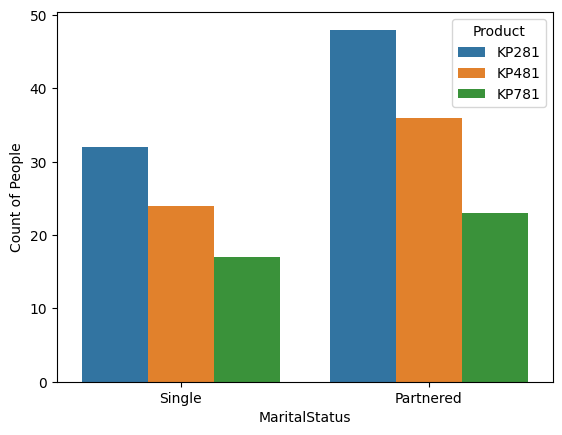

In [71]:
sns.countplot(data=df1, x='MaritalStatus', hue='Product')
plt.ylabel('Count of People')
plt.show()

### Insights:
**Market Segmentation:**<br>
- Partnered individuals account for approximately 59% of the total customer base, while single individuals constitute about 41%. This indicates that partnered individuals are a larger segment of the market.
- Among partnered individuals, KP281 is the most popular product, followed by KP481 and KP781.
- Among single individuals, the same trend holds with KP281 being the most popular product followed by KP481 and KP781.<br>

### Recommendations:
- **Targeted Marketing:** While KP281 seems to have a universal appeal, there might be opportunities to tailor marketing efforts towards specific marital statuses. For instance, promotions highlighting the benefits of certain products in the context of partnerships or single life could be explored.
- **Product Development:** Given the consistent sales of KP281, it might be beneficial to invest in further developing this product line or introducing variations to capitalize on its popularity.
- **Diversification:** While KP281 is performing well, there could be a risk of overreliance on a single product. Exploring new product lines or diversifying offerings could mitigate this risk and tap into different market segments.

In [72]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups,Income_groups,Miles_groups
0,KP281,18,Male,14,Single,3,4,29562,112,Youthful Explorers,Low-Medium,Medium Range
1,KP281,19,Male,15,Single,2,3,31836,75,Youthful Explorers,Low-Medium,Medium Range
2,KP281,19,Female,14,Partnered,4,3,30699,66,Youthful Explorers,Low-Medium,Medium Range
3,KP281,19,Male,12,Single,3,3,32973,85,Youthful Explorers,Low-Medium,Medium Range
4,KP281,20,Male,13,Partnered,4,2,35247,47,Youthful Explorers,Low-Medium,Short Range
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,18,Single,5,5,76331,183,Prime Trailblazers,High,Long Range
176,KP781,42,Male,18,Single,5,4,76331,183,Prime Trailblazers,High,Long Range
177,KP781,45,Male,16,Single,5,5,76331,160,Prime Trailblazers,High,Long Range
178,KP781,45,Male,18,Partnered,4,5,76331,120,Prime Trailblazers,High,Medium Range


# Overall Report

### Summarized Insights:
 - **Age:**
	- KP281: Broad appeal across all age groups.
    - KP481: Maintains presence across different age groups with a specific niche.
    - KP781: Fewest customers, mostly Youthful Explorers and some Prime Trailblazers.

 - **Education:**
	- KP281 and KP481 are preferred across all education levels, with KP281 being the most popular.
	- KP781 is less popular across all education levels, especially for higher education levels.

 - **Usage:**
	- KP281 and KP481 commonly used 3 days a week, while KP781 primarily used 4 and 5 days a week.

 - **Income:**
	- KP281 and KP481 cater to a wider income range, while KP781 targets the high-income group.
    - Untapped potential in the Low-Medium income group for KP281 and KP481.

 - **Miles:**
	- KP281 lacks presence across all mileage ranges.
    - KP781 performs exceptionally well in medium-range miles.
    - KP481 leads in short range but needs analysis for improvement.

 - **Fitness:**
	- KP281 and KP481 are preferred across all consumers with all fitness levels.
	- KP781 associated with consumers with higher self-rated fitness levels

 - **Gender:**
	- Slight male majority in purchases.
    - KP281 equally popular among genders.
    - KP781 has a higher proportion of male customers.

 - **Marital Status:**
	- Partnered individuals are the larger customer segment.
    - KP281 is the top-selling product across both marital statuses.
    - Consistent sales patterns for KP481 and KP781 across both segments.

### Overall Insights:
- KP281 appears to have broad appeal across different demographics and usage patterns.
- KP481 serves a specific niche and maintains moderate presence across segments.
- KP781 targets higher-income, more advanced education, and fitness-oriented customers but with lower overall sales.
- There's potential for growth in untapped segments such as Low-Medium income and specific education levels.
- Gender and marital status don't seem to heavily influence treadmill preference. As market segmentation of Partnered being %59.45 and Single being %40.55 as well as Male being %57.77 and Female being %42.22.
- Marketing strategies could be tailored to enhance performance in areas where products are underperforming, such as increasing KP281's presence across mileage ranges or repositioning KP481 in the market.

### Overall Product-wise Recommendation:
- **KP281:**
	- Age: Continue targeting all age groups but consider diversifying marketing to appeal to specific age segments.
	- Education: Allocate marketing resources to maintain stronghold, especially at education level 16.
	- Usage: Focus on optimizing production and inventory management for frequent users.
	- Income: Develop targeted campaigns for the Low-Medium income segment, highlighting affordability.
	- Miles: Assess market demand for product enhancement and diversify offerings accordingly.
	- Fitness: Tailor marketing to highlight overall health benefits.
	- Gender: Expand product line to attract a more diverse customer base.
	- Marital Status: Explore opportunities to tailor marketing efforts towards specific marital statuses.
- **KP481:**
	- Age: Tailor marketing strategies to resonate with different age groups' preferences.
	- Education: Invest in targeted campaigns to maintain stronghold, especially at education level 16.
	- Usage: Focus on production optimization for frequent users and conduct customer surveys for improvements.
	- Income: Develop campaigns targeting the Low-Medium income segment.
	- Miles: Tailor marketing and assess market demand for product enhancement.
	- Fitness: Focus on highlighting endurance and strength gains.
	- Gender: Expand product line to appeal to both genders.
	- Marital Status: Explore opportunities for targeted promotions based on marital status.
- **KP781:**
	- Age: Investigate reasons for lower popularity among certain age groups and make necessary improvements.
	- Education: Invest in targeted campaigns to capitalize on rising popularity at education level 18.
	- Usage: Explore ways to expand the market by highlighting unique benefits.
	- Income: Consider adjusting marketing strategies or product positioning to better communicate the value proposition.
	- Miles: Assess market demand for product enhancement.
	- Fitness: Analyze aspects contributing to higher fitness perception and incorporate similar features into other products.
	- Gender: Tailor marketing strategies to appeal more to the less represented gender.
	- Marital Status: Explore opportunities for targeted promotions based on marital status.

### Business Decisions:
- **Product Focus:** Invest in enhancing features of the popular KP281 treadmill and maintaining competitiveness of KP481.
- **Targeted Marketing:** Tailor marketing campaigns to highlight the versatility of KP281 and niche appeal of KP781.
- **Market Expansion:** Explore new demographics and international markets based on identified preferences.
- **Pricing Strategy:** Price KP281 as a premium option and KP781 competitively to attract cost-conscious consumers.
- **Feedback Integration:** Continuously gather customer feedback to improve product offerings and customer satisfaction.
- **Distribution Optimization:** Optimize distribution channels to ensure availability and accessibility of products to target customers.

## Extras

In [73]:
pd.crosstab(df1.Product, [df1.MaritalStatus, df1.Gender], margins=True)

MaritalStatus Partnered      Single       All
Gender           Female Male Female Male     
Product                                      
KP281                27   21     13   19   80
KP481                15   21     14   10   60
KP781                 4   19      3   14   40
All                  46   61     30   43  180

In [74]:
pd.crosstab(df1.Product, [df1.MaritalStatus, df1.Gender], margins=True, normalize=True)

MaritalStatus Partnered              Single                 All
Gender           Female      Male    Female      Male          
Product                                                        
KP281          0.150000  0.116667  0.072222  0.105556  0.444444
KP481          0.083333  0.116667  0.077778  0.055556  0.333333
KP781          0.022222  0.105556  0.016667  0.077778  0.222222
All            0.255556  0.338889  0.166667  0.238889  1.000000

In [75]:
pd.crosstab(df1.Product, [df1.MaritalStatus, df1.Gender], margins=True, normalize='index')

MaritalStatus Partnered              Single          
Gender           Female      Male    Female      Male
Product                                              
KP281          0.337500  0.262500  0.162500  0.237500
KP481          0.250000  0.350000  0.233333  0.166667
KP781          0.100000  0.475000  0.075000  0.350000
All            0.255556  0.338889  0.166667  0.238889

In [76]:
pd.crosstab(df1.Product, [df1.MaritalStatus, df1.Gender], margins=True, normalize='columns')

MaritalStatus Partnered              Single                 All
Gender           Female      Male    Female      Male          
Product                                                        
KP281          0.586957  0.344262  0.433333  0.441860  0.444444
KP481          0.326087  0.344262  0.466667  0.232558  0.333333
KP781          0.086957  0.311475  0.100000  0.325581  0.222222

#### Product profiling
Out of total consumers, probability to buy KP281 is 44.44%, KP481 is 33.33% and KP2781 is 22.22%.
- KP281: Probability of purchasing this product is **Partnered-Female>Partnered-Male>Single-Male>Single-Female** that is **33.75%>26.25%>23.75%>16.25%**
- KP481: Probability of purchasing this product is **Partnered-Male>Partnered-Female>Single-Female>Single-Male** that is **35%>25%>23.33%>16.67%**
- KP781: Probability of purchasing this product is **Partnered-Male>Single-Male>Partnered-Female>Single-Female** that is **47.5%>35%>10%>7.5%**	

#### Consumer Profiling:
Out of total consumers, probability to purchase of Partnered-Male is 33.89%, Partnered-Female is 25.56%, Single-Female is 16.67% and Single-Male is 23.89%
- Partnered-Male will buy KP281 and KP481, prabability being 34.42%, same for both product
- Partnered-Female will buy KP281, probability being 58.69%
- Single-Female's preference to buy KP481 slightly more than KP281 as probability being 46.67% and 43.33% respectively.
- Single-Male will buy KP281, probability being 44.18%